In [4]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt

# Settings
plt.rc('font', family='Times New Roman', size=14)
plt.rcParams['mathtext.fontset'] = 'custom'

plt.rcParams['mathtext.it'] = 'STIXGeneral:italic'
plt.rcParams['mathtext.rm'] = 'STIXGeneral:bold'
plt.rcParams['mathtext.tt'] = 'STIXGeneral'
plt.rcParams['mathtext.bf'] = 'STIXGeneral:bold:italic'
plt.rcParams['mathtext.cal'] = 'STIXGeneral'
plt.rcParams['mathtext.sf'] = 'STIXGeneral'

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1

In [5]:
result2 = focus_parser.parse_Sdiag('./data/hubbard2d/output.oodmrg.n16u4')

NameError: name 'focus_parser' is not defined

In [10]:
indices = abs(result['acceptance']-1)<2
indices_accept = abs(result['acceptance']-1)<0.1
accept = np.argwhere(indices_accept==True).flatten()
len(accept),len(result['emin'][accept])

(20, 20)

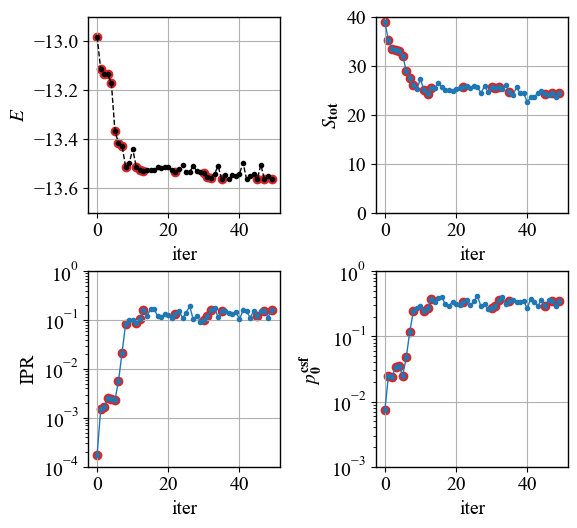

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(6,5.5))

axs[0,0].plot(result['emin'][indices],'k.--')
axs[0,0].set_ylabel('$E$')
axs[0,0].set_xlabel('iter')
axs[0,0].set_ylim(-13.7,-12.9)
axs[0,0].scatter(accept,result['emin'][accept],color='tab:red',marker='o')

axs[0,1].plot(np.array(result['Srenyi'])[indices],'.-')
axs[0,1].set_ylabel('$S_{\mathrm{tot}}$')
axs[0,1].set_xlabel('iter')
axs[0,1].set_ylim(0,40)
axs[0,1].scatter(accept,np.array(result['Srenyi'])[accept],color='tab:red')

axs[1,0].plot(np.array(result2['IPR'])[1:][indices],'.-')
axs[1,0].set_ylabel('IPR')
axs[1,0].set_xlabel('iter')
axs[1,0].set_yscale('log')
axs[1,0].set_ylim(1.e-4,1)
axs[1,0].scatter(accept,np.array(result2['IPR'])[1:][accept],color='tab:red')

axs[1,1].plot(np.array(result2['cmax'])[1:][indices]**2,'.-')
axs[1,1].set_ylabel('$p_0^\mathrm{csf}$')
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel('iter')
axs[1,1].set_ylim(1.e-3,1)
axs[1,1].scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='tab:red')

axs[0,0].grid()
axs[0,1].grid()
axs[1,0].grid()
axs[1,1].grid()

plt.tight_layout()
plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.savefig('hubbard2d.pdf')

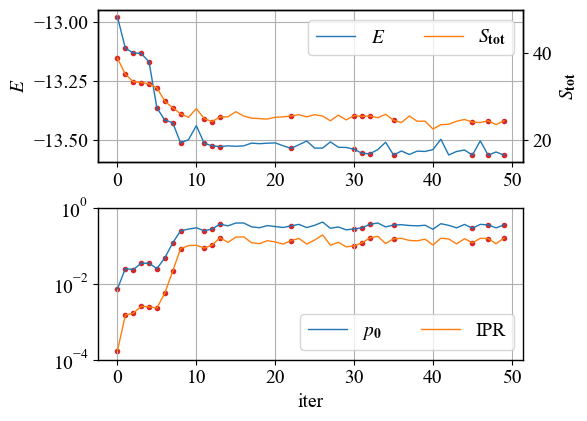

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(6,4.5))

axs[0].plot(result['emin'][indices],'-',label='$E$')
axs[0].set_ylabel('$E$')
#axs[0].set_xlabel('iter')
#axs[0].set_ylim(-13.7,-12.9)
axs[0].scatter(accept,result['emin'][accept],color='tab:red',marker='.')
axs[0].legend()

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '-', color='tab:orange',label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],color='tab:red',marker='.')
ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
ax1_2.set_ylim(15,50)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=2)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'-',color='tab:blue',label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='tab:red',marker='.')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'-',label='IPR',color='tab:orange')
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
axs[1].set_ylim(1.e-4,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],color='tab:red',marker='.')
axs[1].legend(ncol=2)

axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.savefig('hubbard2d.pdf')

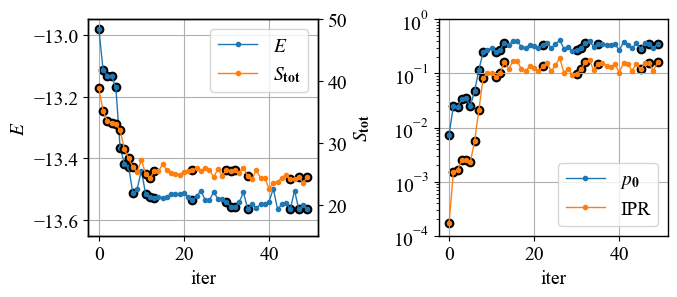

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(7,3.2))

axs[0].plot(result['emin'][indices],'.-',label='$E$')
axs[0].set_ylabel('$E$')
axs[0].set_xlabel('iter')
axs[0].set_ylim(-13.65,-12.95)
axs[0].scatter(accept,result['emin'][accept],color='black',marker='o')

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color='tab:orange',label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],color='black',marker='o')
ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
ax1_2.set_ylim(15,50)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=1)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'.-',color='tab:blue',label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='black',marker='o')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'.-',label='IPR',color='tab:orange')
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
axs[1].set_ylim(1.e-4,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],color='black',marker='o')
axs[1].legend(ncol=1)

axs[0].grid()
axs[1].grid()

#plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.tight_layout()
plt.savefig('hubbard2d.pdf')

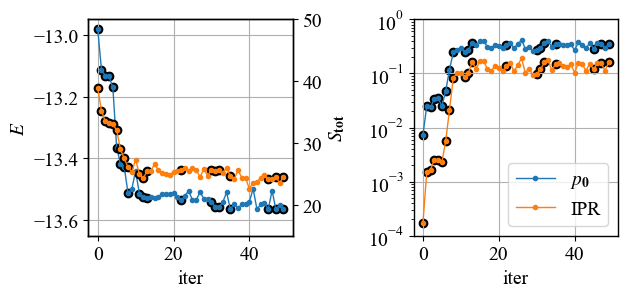

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(6.5,3.2))

axs[0].plot(result['emin'][indices],'.-',label='$E$')
axs[0].set_ylabel('$E$')
axs[0].set_xlabel('iter')
axs[0].set_ylim(-13.65,-12.95)
axs[0].scatter(accept,result['emin'][accept],color='black',marker='o')

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color='tab:orange',label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],color='black',marker='o')
ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
ax1_2.set_ylim(15,50)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'.-',color='tab:blue',label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='black',marker='o')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'.-',label='IPR',color='tab:orange')
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
axs[1].set_ylim(1.e-4,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],color='black',marker='o')
axs[1].legend(ncol=1)

axs[0].grid()
axs[1].grid()

#plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.tight_layout()
plt.savefig('hubbard2d.pdf')

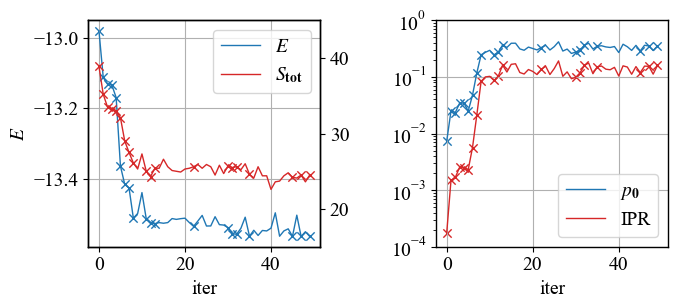

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 创建主图和子图
fig, axs = plt.subplots(1, 2, figsize=(7, 3.3))

# 创建渐变色
cmap = plt.cm.coolwarm  # 这是一个从蓝色到红色的渐变色
norm = plt.Normalize(vmin=0, vmax=1)  # 归一化数据值
blue = 'tab:blue' #cmap(norm(0))
red = 'tab:red' #cmap(norm(1))

#====== FeMoco =======

# 主图绘制
axs[0].plot(result['emin'], '-', label='$E$', color=blue)
axs[0].set_ylabel('$E$')
axs[0].set_xlabel('iter')
#axs[0,0].set_ylim(-13.65, -12.95)
#axs[1,0].scatter(femoco_accept, femoco_result['emin'][femoco_accept], facecolors='none', marker='s', s=80, edgecolors='k')
axs[0].scatter(accept, result['emin'][accept], marker='x', facecolors=blue)

# 在主图上添加插图
ax_inset = axs[0].twinx()
#ax_inset = inset_axes(axs[1,0], width="50%", height="45%", loc="upper right")  # 调整插图的位置和大小
ax_inset.plot(np.array(result['Srenyi']), '-', color=red, label='$S_{\mathrm{tot}}$')
ax_inset.scatter(accept, np.array(result['Srenyi'])[accept], marker='x', facecolors=red)
#ax_inset.set_ylabel('$S_{\mathrm{tot}}$')
ax_inset.set_ylim(15,45)

# 合并图例
handles1, labels1 = axs[0].get_legend_handles_labels()
handles2, labels2 = ax_inset.get_legend_handles_labels()
axs[0].legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=1)

#ax_inset.set_ylim(15, 50)
# ax_inset.grid()
# ax_inset.set_xticklabels([])  # 可选：移除插图的x轴标签
# ax_inset.set_yticklabels([])  # 可选：移除插图的y轴标签
# ax_inset.set_xticks(np.arange(0, 50, 20))  # 设置x刻度
# ax_inset.set_xticklabels(np.arange(0, 50, 20))  # 设置x刻度标签
# ax_inset.set_yticks(np.arange(15, 50, 15))  # 设置x刻度
# ax_inset.set_yticklabels(np.arange(15, 50, 15))  # 设置x刻度标签

# 为第二个子图绘制数据
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:]**2, '-', color=blue, label='$p_0$')
ax2.scatter(accept, np.array(result2['cmax'])[1:][accept]**2, marker='x', facecolors=blue)

ax2.plot(np.array(result2['IPR'])[1:], '-', label='IPR', color=red)
ax2.set_xlabel('iter')
ax2.set_yscale('log')
ax2.set_ylim(1.e-4, 1)
ax2.scatter(accept, np.array(result2['IPR'])[1:][accept], marker='x', facecolors=red)
ax2.legend(ncol=1)
#ax2.yaxis.tick_right()

# axs[0].set_xticks([0,50,100,150])
# axs[1].set_xticks([0,50,100,150])

# 添加网格
axs[0].grid()
axs[1].grid()
# axs[1,0].grid()
# axs[1,1].grid()

# 调整布局
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)#, left=0.1) #,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近

# 保存图形
plt.savefig('opthubbard2d.pdf')
plt.show()

/var/folders/qd/v2qd0s4n4w3flpf2dgfyvqzh0000gn/T/ipykernel_41733/2735386562.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


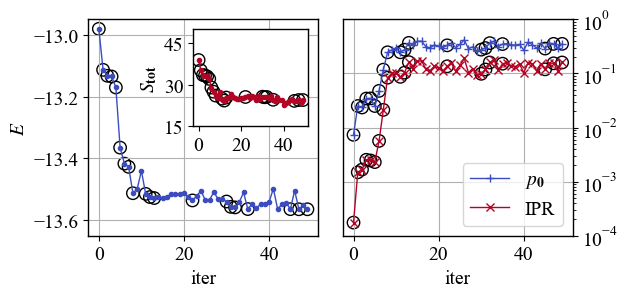

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 创建主图和子图
fig, axs = plt.subplots(1, 2, figsize=(6.5, 3.2))

# 创建渐变色
cmap = plt.cm.coolwarm  # 这是一个从蓝色到红色的渐变色
norm = plt.Normalize(vmin=0, vmax=1)  # 归一化数据值
blue = cmap(norm(0))
red = cmap(norm(1))

# 主图绘制
axs[0].plot(result['emin'][indices], '.-', label='$E$', color=blue)
axs[0].set_ylabel('$E$')
axs[0].set_xlabel('iter')
axs[0].set_ylim(-13.65, -12.95)
axs[0].scatter(accept, result['emin'][accept], facecolors='none', marker='o', s=80, edgecolors='k')

# # 为第一个子图添加第二个Y轴
# ax1 = axs[0]
# ax1_2 = ax1.twinx()
# # 这里添加第二个Y轴的数据
# ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color='tab:orange', label='$S_{\mathrm{tot}}$')
# ax1_2.scatter(accept, np.array(result['Srenyi'])[accept], color='black', marker='o')
# ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
# ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
# ax1_2.set_ylim(15, 50)

# 在主图上添加插图
ax_inset = inset_axes(axs[0], width="50%", height="45%", loc="upper right")  # 调整插图的位置和大小
ax_inset.plot(np.array(result['Srenyi'])[indices], '.-', color=red, label='$S_{\mathrm{tot}}$')
ax_inset.scatter(accept, np.array(result['Srenyi'])[accept], facecolors='none', marker='o', s=80, edgecolors='k')
ax_inset.set_ylabel('$S_{\mathrm{tot}}$')
ax_inset.set_ylim(15, 50)
# ax_inset.grid()
# ax_inset.set_xticklabels([])  # 可选：移除插图的x轴标签
# ax_inset.set_yticklabels([])  # 可选：移除插图的y轴标签
ax_inset.set_xticks(np.arange(0, 50, 20))  # 设置x刻度
ax_inset.set_xticklabels(np.arange(0, 50, 20))  # 设置x刻度标签
ax_inset.set_yticks(np.arange(15, 50, 15))  # 设置x刻度
ax_inset.set_yticklabels(np.arange(15, 50, 15))  # 设置x刻度标签

# 为第二个子图绘制数据
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2, '+-', color=blue, label='$p_0$')
ax2.scatter(accept, np.array(result2['cmax'])[1:][accept]**2, facecolors='none', marker='o', s=80, edgecolors='k')

ax2.plot(np.array(result2['IPR'])[1:][indices], 'x-', label='IPR', color=red)
ax2.set_xlabel('iter')
ax2.set_yscale('log')
ax2.set_ylim(1.e-4, 1)
ax2.scatter(accept, np.array(result2['IPR'])[1:][accept], facecolors='none', marker='o', s=80, edgecolors='k')
ax2.legend(ncol=1)
ax2.yaxis.tick_right()

# 添加网格
axs[0].grid()
axs[1].grid()

# 调整布局
plt.tight_layout()
plt.subplots_adjust(wspace=0.11)#, left=0.1) #,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近

# 保存图形
plt.savefig('hubbard2d.pdf')
plt.show()

In [17]:
site_basis = np.identity(16)
no_basis = np.loadtxt('./data/hubbard2d/urot_n16u4noSITE.txt')
emo_basis = np.loadtxt('./data/hubbard2d/urot_n16u4opt.txt')

In [18]:
np.max(emo_basis**2),np.max(emo_basis**2)

(0.3903870233448434, 0.3903870233448434)

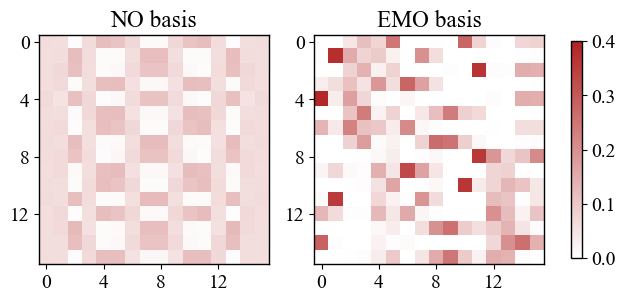

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#plt.switch_backend('pdf')

valmax = 0.4

# Create the plot
fig, axs = plt.subplots(1, 2, figsize=(7,3.2))

from matplotlib.colors import LinearSegmentedColormap
colors = ["white", "firebrick"]  # 白色到深橙色
cmap = LinearSegmentedColormap.from_list("white_to_darkorange", colors)

#cmap = 'Reds'
#cmap = 'bwr'

cax1 = axs[0].imshow(no_basis**2, cmap=cmap, interpolation='none', vmax=valmax, vmin=0)
axs[0].set_title('NO basis')

axs[1].imshow(emo_basis**2, cmap=cmap, interpolation='none', vmax=valmax, vmin=0)
axs[1].set_title('EMO basis')

# 设置x和y的刻度为一致
for ax in axs:
    ax.set_xticks(np.arange(0, no_basis.shape[1], 4))  # 设置x刻度
    ax.set_yticks(np.arange(0, no_basis.shape[0], 4))  # 设置y刻度
    ax.set_xticklabels(np.arange(0, no_basis.shape[1], 4))  # 设置x刻度标签
    ax.set_yticklabels(np.arange(0, no_basis.shape[0], 4))  # 设置y刻度标签

# 创建共享的 colorbar
fig.colorbar(cax1, ax=axs, orientation='vertical', fraction=0.02, pad=0.05)

# plt.subplots_adjust(wspace=0.3)

plt.savefig('urot.png', dpi=1000)
plt.show()

In [22]:
result = parse_oodmrg_old('./data/fe2s2/opt100/output.oodmrg')

  iter accept      enew            emin        deltaE    lowerE   sdnew    sdiag    srnew    srenyi   |Ui-I|



In [23]:
result2 = parse_Sdiag_old('./data/fe2s2/opt100/output.oodmrg')

In [24]:
indices = abs(result['acceptance']-1)<2
indices_accept = abs(result['acceptance']-1)<0.1
accept = np.argwhere(indices_accept==True).flatten()
len(accept),len(result['emin'][accept])

(8, 8)

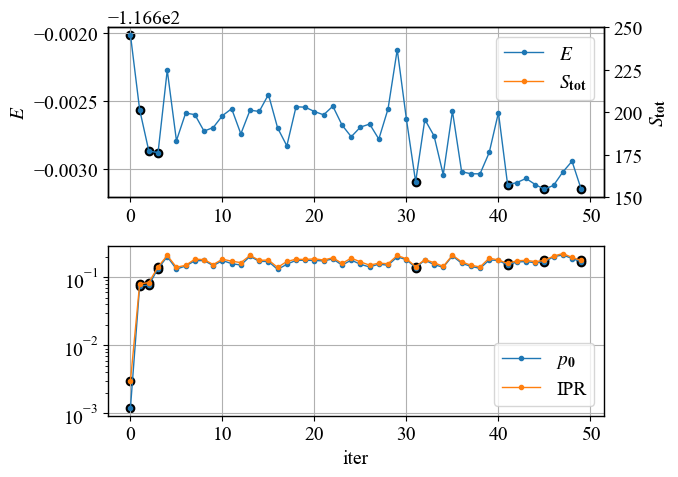

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(7,5))

axs[0].plot(result['emin'][indices],'.-',label='$E$')
axs[0].set_ylabel('$E$')
#axs[0].set_xlabel('iter')
#axs[0].set_ylim(-1118.9,-1118.4)
axs[0].scatter(accept,result['emin'][accept],color='black',marker='o')

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color='tab:orange',label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],color='black',marker='o')
ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
ax1_2.set_ylim(150,250)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=1)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'.-',color='tab:blue',label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='black',marker='o')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'.-',label='IPR',color='tab:orange')
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
#axs[1].set_ylim(1.e-10,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],color='black',marker='o')
axs[1].legend(ncol=1)

axs[0].grid()
axs[1].grid()

#plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.tight_layout()
plt.savefig('optfe2s2.pdf')

## S_tot may be wrong due to the previous bug in Sr!

In [27]:
result2 = parse_Sdiag_old('./data/fe2s2/opt100/output.oodmrg')

In [28]:
indices = abs(result['acceptance']-1)<2
indices_accept = abs(result['acceptance']-1)<0.1
accept = np.argwhere(indices_accept==True).flatten()
len(accept),len(result['emin'][accept])

(25, 25)

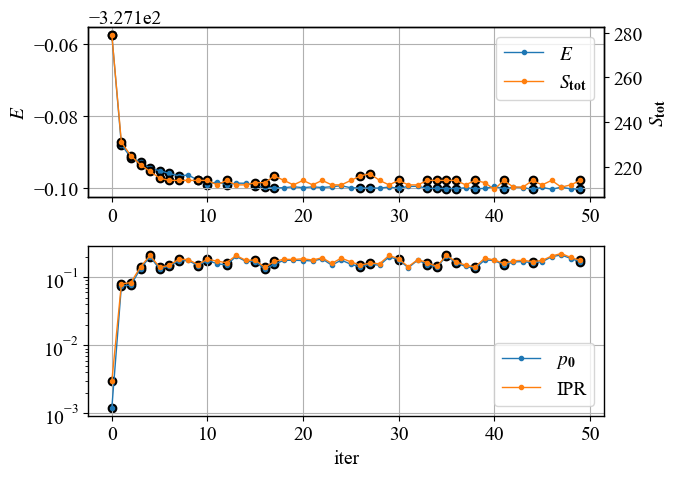

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(7,5))

axs[0].plot(result['emin'][indices],'.-',label='$E$')
axs[0].set_ylabel('$E$')
#axs[0].set_xlabel('iter')
#axs[0].set_ylim(-1118.9,-1118.4)
axs[0].scatter(accept,result['emin'][accept],color='black',marker='o')

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color='tab:orange',label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],color='black',marker='o')
ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
#ax1_2.set_ylim(150,250)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=1)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'.-',color='tab:blue',label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='black',marker='o')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'.-',label='IPR',color='tab:orange')
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
#axs[1].set_ylim(1.e-10,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],color='black',marker='o')
axs[1].legend(ncol=1)

axs[0].grid()
axs[1].grid()

#plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.tight_layout()
plt.savefig('optfe4s4.pdf')

In [30]:
result = parse_oodmrg_old('./data/fe8s7/output.oodmrg.opt100')
result2 = parse_Sdiag_old('./data/fe8s7/output.oodmrg.opt100')

  iter accept      enew            emin        deltaE    lowerE   sdnew    sdiag    srnew    srenyi   |Ui-I|



In [31]:
indices = abs(result['acceptance']-1)<2
indices_accept = abs(result['acceptance']-1)<0.1
accept = np.argwhere(indices_accept==True).flatten()
len(accept),len(result['emin'][accept])

(42, 42)

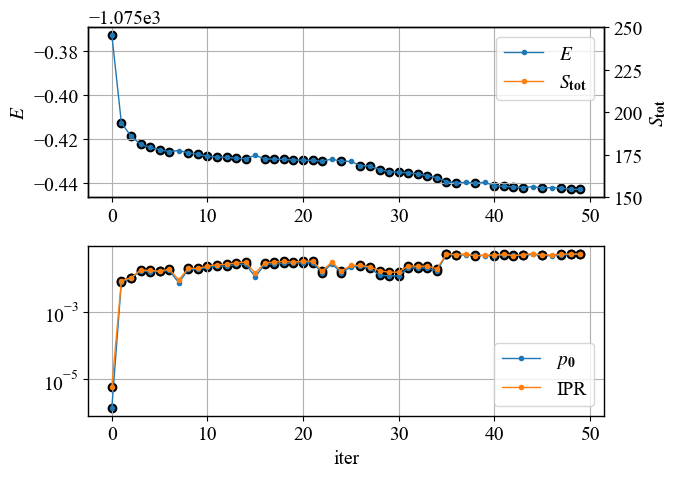

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(7,5))

axs[0].plot(result['emin'][indices],'.-',label='$E$')
axs[0].set_ylabel('$E$')
#axs[0].set_xlabel('iter')
#axs[0].set_ylim(-1118.9,-1118.4)
axs[0].scatter(accept,result['emin'][accept],color='black',marker='o')

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color='tab:orange',label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],color='black',marker='o')
ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
ax1_2.set_ylim(150,250)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=1)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'.-',color='tab:blue',label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='black',marker='o')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'.-',label='IPR',color='tab:orange')
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
#axs[1].set_ylim(1.e-10,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],color='black',marker='o')
axs[1].legend(ncol=1)

axs[0].grid()
axs[1].grid()

#plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.tight_layout()
plt.savefig('optpcluster.pdf')

In [33]:
result = focus_parser.parse_oodmrg('./data/femoco/output.oodmrg.init29opt100a')
result2 = focus_parser.parse_Sdiag('./data/femoco/output.oodmrg.init29opt100a')

In [34]:
indices = abs(result['acceptance']-1)<2
indices_accept = abs(result['acceptance']-1)<0.1
accept = np.argwhere(indices_accept==True).flatten()
len(accept),len(result['emin'][accept])

(40, 40)

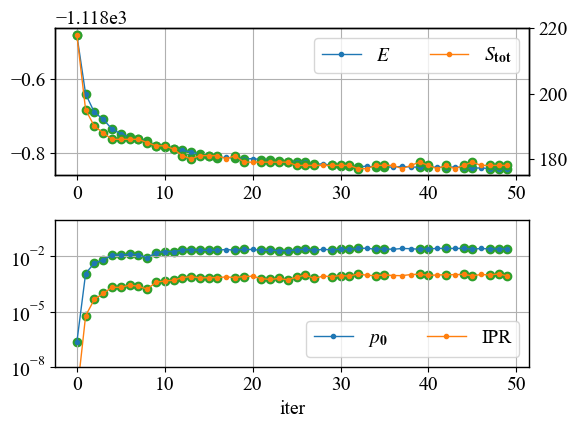

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(6,4.5))

axs[0].plot(result['emin'][indices],'.-',label='$E$')
#axs[0].set_ylabel('$E$')
#axs[0].set_xlabel('iter')
#axs[0].set_ylim(-13.7,-12.9)
axs[0].scatter(accept,result['emin'][accept],color='tab:green',marker='o')
axs[0].legend()

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color='tab:orange',label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],color='tab:green')
#ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
#ax1_2.set_ylim(0,300)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=2)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'.-',color='tab:blue',label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,color='tab:green')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'.-',label='IPR',color='tab:orange')
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
axs[1].set_ylim(1.e-8,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],color='tab:green')
axs[1].legend(ncol=2)

axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.savefig('hubbard2d.pdf')

## merged

In [36]:
result_a = focus_parser.parse_oodmrg('./data/femoco/output.oodmrg.init29opt100a')
result_b = focus_parser.parse_oodmrg('./data/femoco/output.oodmrg.init29opt100b')
result_c = focus_parser.parse_oodmrg('./data/femoco/output.oodmrg.init29opt100c')

In [37]:
result = {}
for key in result_a:
    result[key] = np.hstack([result_a[key],
                               result_b[key],
                               result_c[key]])

In [38]:
result2_a = focus_parser.parse_Sdiag('./data/femoco/output.oodmrg.init29opt100a')
result2_b = focus_parser.parse_Sdiag('./data/femoco/output.oodmrg.init29opt100b')
result2_c = focus_parser.parse_Sdiag('./data/femoco/output.oodmrg.init29opt100c')

In [39]:
np.array(result2_a['cmax'])**2

array([1.9114384e-07, 2.1178404e-07, 1.1634921e-03, 4.3731769e-03,
       6.1449921e-03, 1.1750560e-02, 1.1728890e-02, 1.2791610e-02,
       1.2454560e-02, 8.1974916e-03, 1.6027560e-02, 1.7929210e-02,
       1.8063360e-02, 2.1667840e-02, 2.2982560e-02, 2.1054010e-02,
       2.1286810e-02, 2.1579610e-02, 2.3470240e-02, 2.1462250e-02,
       2.3685210e-02, 2.3562250e-02, 2.1170250e-02, 2.1170250e-02,
       2.0678440e-02, 1.9881000e-02, 2.2380160e-02, 2.4149160e-02,
       2.1462250e-02, 2.3901160e-02, 2.2680360e-02, 2.3963040e-02,
       2.3654440e-02, 2.6994490e-02, 2.7489640e-02, 2.3994010e-02,
       2.5185690e-02, 2.4180250e-02, 2.6634240e-02, 2.6082250e-02,
       2.4056010e-02, 2.5376490e-02, 2.6928810e-02, 2.6666890e-02,
       2.6863210e-02, 2.6928810e-02, 2.4492250e-02, 2.6732250e-02,
       2.4995610e-02, 2.5090560e-02, 2.5027240e-02])

In [40]:
result2 = {}
for key in result2_a:
    result2[key] = np.hstack([result2_a[key],
                               result2_b[key][1:],
                               result2_c[key][1:]])

In [41]:
indices = abs(result['acceptance']-1)<2
indices_accept = abs(result['acceptance']-1)<0.1
accept = np.argwhere(indices_accept==True).flatten()
len(accept),len(result['emin'][accept])

(93, 93)

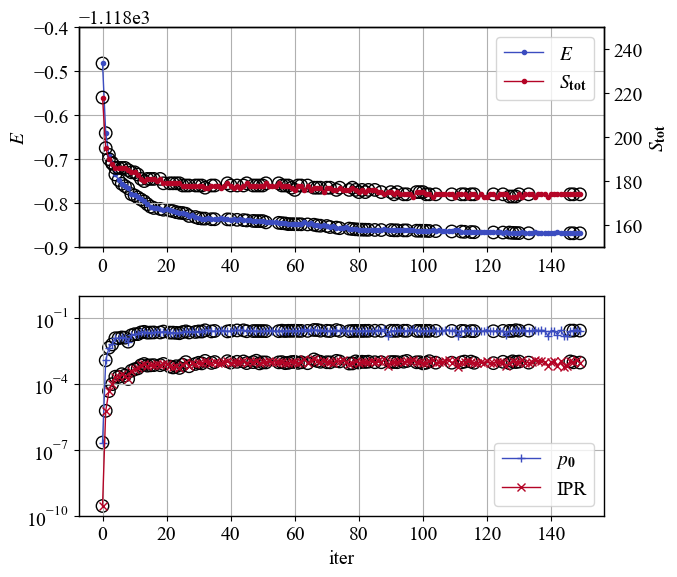

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(7,6))

# 创建渐变色
cmap = plt.cm.coolwarm  # 这是一个从蓝色到红色的渐变色
norm = plt.Normalize(vmin=0, vmax=1)  # 归一化数据值
blue = cmap(norm(0))
red = cmap(norm(1))

axs[0].plot(result['emin'][indices],'.-',label='$E$', color=blue)
axs[0].set_ylabel('$E$')
#axs[0].set_xlabel('iter')
axs[0].set_ylim(-1118.9,-1118.4)
axs[0].scatter(accept,result['emin'][accept],facecolors='none', marker='o', s=80, edgecolors='k')

# 为第一个子图添加第二个Y轴
ax1 = axs[0]
ax1_2 = ax1.twinx()
# 这里添加第二个Y轴的数据，例如：
ax1_2.plot(np.array(result['Srenyi'])[indices], '.-', color=red,label='$S_{\mathrm{tot}}$')
ax1_2.scatter(accept,np.array(result['Srenyi'])[accept],facecolors='none', marker='o', s=80, edgecolors='k')
ax1_2.set_ylabel('$S_{\mathrm{tot}}$')  # 设置第二个Y轴标签
ax1_2.tick_params(axis='y')  # 可以设置颜色等属性
ax1_2.set_ylim(150,250)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', ncol=1)

# 为第一个子图添加第二个Y轴
ax2 = axs[1]
ax2.plot(np.array(result2['cmax'])[1:][indices]**2,'+-',color=blue,label='$p_0$')
ax2.scatter(accept,np.array(result2['cmax'])[1:][accept]**2,facecolors='none', marker='o', s=80, edgecolors='k')

axs[1].plot(np.array(result2['IPR'])[1:][indices],'x-',label='IPR',color=red)
#axs[1].set_ylabel('IPR')
axs[1].set_xlabel('iter')
axs[1].set_yscale('log')
axs[1].set_ylim(1.e-10,1)
axs[1].scatter(accept,np.array(result2['IPR'])[1:][accept],facecolors='none', marker='o', s=80, edgecolors='k')
axs[1].legend(ncol=1)

axs[0].grid()
axs[1].grid()

#plt.subplots_adjust(wspace=0.5,hspace=0.3)#, left=0.1, right=0.9)  # wspace 越小，子图越近
plt.tight_layout()
plt.savefig('optfemoco.pdf')

In [43]:
femoco_result = result
femoco_accept = accept
femoco_result2 = result2

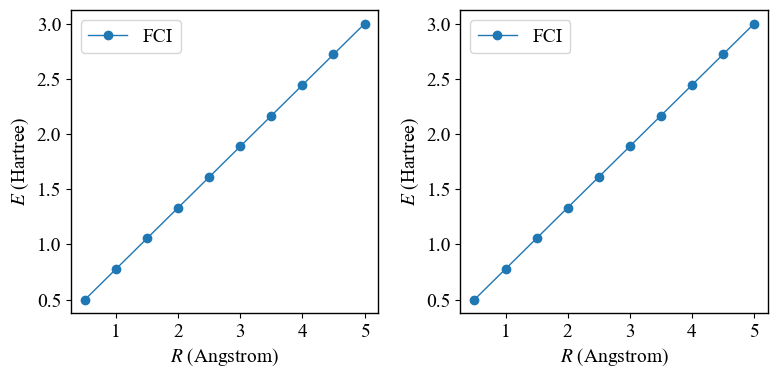

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))

import numpy as np
xdata = np.linspace(0.5,5,10)
ydata = np.linspace(0.5,3,10)

axs[0].plot(xdata, ydata, 'o-', label='FCI')

axs[0].set_xlabel('$R$ (Angstrom)')
axs[0].set_ylabel('$E$ (Hartree)')
axs[0].legend()

axs[1].plot(xdata, ydata, 'o-', label='FCI')
axs[1].set_xlabel('$R$ (Angstrom)')
axs[1].set_ylabel('$E$ (Hartree)')
axs[1].legend()

plt.tight_layout()
plt.savefig('example.pdf')